In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fname='afa_test_400.csv'
colfilter = ['Process','Period','PV']

In [2]:
a = pd.read_csv(fname, delimiter=';', usecols = colfilter)
a = a[colfilter]
a=a.groupby(['Process', 'Period']).sum()
a=a.reset_index()
procs = a.Process.unique()

dfdict = {i : pd.DataFrame for i in procs}
pltdict = {i : np.array for i in procs}

years = np.arange(2013,2101)

for key in dfdict.keys():
    op = np.zeros(len(years))
    dfdict[key] = a[:][a.Process == key]
    dfdict[key] = dfdict[key].drop(columns='Process')
    yr1=dfdict[key]['Period'].to_numpy()
    op1=dfdict[key]['PV'].to_numpy()
    yr2=[]
    op2=[]
    for i in range(1,len(yr1)):
        diffy=yr1[i]-yr1[i-1]
        if diffy>1:
            for j in range(1,diffy+1):
                yr2.append(yr1[i-1]+j)
                op2.append(0)
        else:
            yr2.append(yr1[i])
            op2.append(op1[i])
                
    idx1 = yr2[0]-2013
    idx2 = yr2[-1]-2013

    op[idx1:idx2+1]=op2
    pltdict[key]=op

[2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100]
38
87
50
[2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100]
10
87
78
[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2

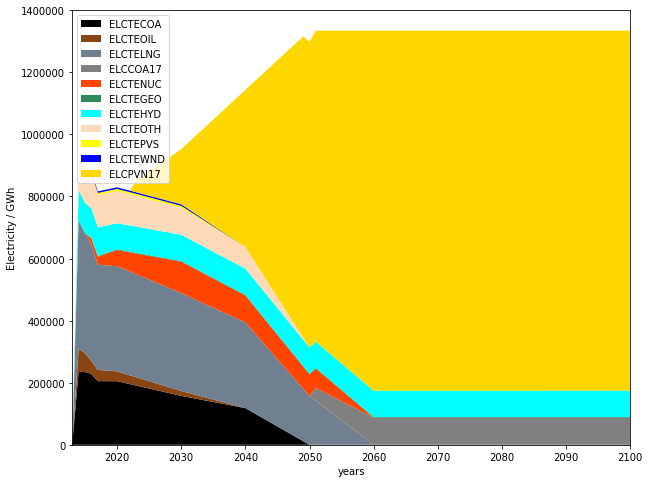

In [9]:
#labels=list(pltdict.keys())
#print(labels)
ordlegend=['ELCTECOA','ELCTEOIL','ELCTELNG','ELCCOA17', 'ELCTENUC','ELCTEGEO', 'ELCTEHYD', 
            'ELCTEOTH', 'ELCTEPVS', 'ELCTEWND','ELCPVN17']
colours = ['black', 'saddlebrown', 'slategray', 'gray', 'orangered', 'seagreen','aqua', 
          'peachpuff', 'yellow','blue', 'gold']
f, ax = plt.subplots(figsize=(10, 8))
ax.stackplot(years, pltdict['ELCTECOA'], pltdict['ELCTEOIL'], pltdict['ELCTELNG'], pltdict['ELCCOA17'], 
             pltdict['ELCTENUC'],pltdict['ELCTEGEO'], pltdict['ELCTEHYD'], pltdict['ELCTEOTH'], 
             pltdict['ELCTEPVS'], pltdict['ELCTEWND'],pltdict['ELCPVN17'],labels=ordlegend, colors=colours)
ax.set_xlim((2013, 2100))
ax.legend(loc='upper left')
ax.set_xlabel('years')
ax.set_ylabel('Electricity / GWh')
f.savefig('afa_test.jpg', dpi=600)

